## Análise Exploratória de Dados Agrícolas  
Este notebook tem como objetivo realizar uma análise exploratória inicial
sobre dados de agricultura inteligente, avaliando fatores ambientais,
práticas agrícolas e seus impactos na produtividade das culturas.

O foco é entender a estrutura dos dados, verificar sua qualidade
e extrair insights iniciais relevantes para o contexto do agronegócio.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_crop = pd.read_csv("Smart_Farming_Crop_Yield_2024.csv")

df_crop.head()

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,NaN
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,2024-02-03,2024-06-26,144,2931.16,SENS0003,2024-02-28,19.503156,79.068206,0.80,Mild
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,2024-02-21,2024-07-04,134,4227.80,SENS0004,2024-05-14,31.071298,85.519998,0.44,NaN
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,2024-02-05,2024-05-20,105,4979.96,SENS0005,2024-04-13,16.568540,81.691720,0.84,Severe


In [5]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       350 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  5

## Padronização dos Nomes das Colunas

Para melhorar a legibilidade e facilitar a análise,
as colunas do dataset foram renomeadas para o português,
utilizando nomes descritivos e padronizados.

Essa etapa ajuda a evitar ambiguidades e torna o código
mais claro e compreensível, especialmente em ambientes colaborativos.


In [6]:
# Renomeando todas as colunas para português
# para facilitar a interpretação e análise

df_crop.rename(columns={
    "farm_id": "id_fazenda",
    "region": "regiao",
    "crop_type": "tipo_cultura",
    "soil_moisture_%": "umidade_solo_pct",
    "soil_pH": "ph_solo",
    "temperature_C": "temperatura_ambiente_c",
    "rainfall_mm": "chuva_mm",
    "humidity_%": "umidade_relativa_pct",
    "sunlight_hours": "horas_sol",
    "irrigation_type": "tipo_irrigacao",
    "fertilizer_type": "tipo_fertilizante",
    "pesticide_usage_ml": "uso_pesticida_ml",
    "sowing_date": "data_plantio",
    "harvest_date": "data_colheita",
    "total_days": "dias_cultivo",
    "yield_kg_per_hectare": "produtividade_kg_por_hectare",
    "sensor_id": "id_sensor",
    "timestamp": "timestamp_coleta",
    "latitude": "latitude",
    "longitude": "longitude",
    "NDVI_index": "indice_ndvi",
    "crop_disease_status": "status_doenca_cultura"
}, inplace=True)

df_crop.columns


Index(['id_fazenda', 'regiao', 'tipo_cultura', 'umidade_solo_pct', 'ph_solo',
       'temperatura_ambiente_c', 'chuva_mm', 'umidade_relativa_pct',
       'horas_sol', 'tipo_irrigacao', 'tipo_fertilizante', 'uso_pesticida_ml',
       'data_plantio', 'data_colheita', 'dias_cultivo',
       'produtividade_kg_por_hectare', 'id_sensor', 'timestamp_coleta',
       'latitude', 'longitude', 'indice_ndvi', 'status_doenca_cultura'],
      dtype='object')

In [7]:
# Renomeando o nome das culturas do inglês para português

mapa_culturas = {
    "Wheat": "Trigo",
    "Soybean": "Soja",
    "Maize": "Milho",
    "Cotton": "Algodão",
    "Rice": "Arroz"
}

df_crop["tipo_cultura_pt"] = df_crop["tipo_cultura"].map(mapa_culturas)

df_crop[["tipo_cultura", "tipo_cultura_pt"]].head()

,tipo_cultura,tipo_cultura_pt
0,Wheat,Trigo
1,Soybean,Soja
2,Wheat,Trigo
3,Maize,Milho
4,Cotton,Algodão


In [8]:
# Verificação de registros duplicados

df_crop.duplicated().value_counts()

,count
False,500


## Organização das Variáveis por Função

As variáveis do dataset foram organizadas em grupos lógicos,
de acordo com sua função analítica.

Essa separação facilita a leitura do projeto e prepara a base
para análises estatísticas, visualizações e possíveis modelos preditivos.


In [9]:
# Separação das colunas do dataset em grupos lógicos.
# Ajudando na leitura, análise e facilitando as etapas futuras.

colunas_identificação = [
    "id_fazenda", "id_sensor", "timestamp_coleta", "latitude", "longitude", "regiao"
]

colunas_categoricas = [
    "tipo_cultura", "tipo_irrigacao", "tipo_fertilizante", "status_doenca_cultura"
]

colunas_numéricas = [
    "umidade_solo_pct", "ph_solo", "temperatura_ambiente_c", "chuva_mm", "umidade_relativa_pct",
    "horas_sol", "uso_pesticida_ml", "dias_cultivo"
]

colunas_resultado = [
    "produtividade_kg_por_hectare", "indice_ndvi"
]

## Auditoria de Qualidade dos Dados

Nesta etapa foi realizada uma verificação da qualidade do dataset,
com foco na identificação de valores ausentes (NaNs).

O objetivo foi avaliar a consistência dos dados e identificar
quais variáveis exigiriam tratamento antes das análises.


In [10]:
# Avaliando a qualidade do dataset,
# identificando colunas com dados faltantes.

faltantes = df_crop.isna().sum()
percentual_faltantes = (faltantes / len(df_crop)) * 100

auditoria_nans = pd.DataFrame({
    "valores_faltantes": faltantes,
    "percentual_%": percentual_faltantes.round(2)
})

auditoria_nans.sort_values(by="percentual_%", ascending=False)

,valores_faltantes,percentual_%
tipo_irrigacao,150,30.0
status_doenca_cultura,130,26.0
id_fazenda,0,0.0
umidade_solo_pct,0,0.0
ph_solo,0,0.0
regiao,0,0.0
tipo_cultura,0,0.0
chuva_mm,0,0.0
temperatura_ambiente_c,0,0.0
horas_sol,0,0.0


## Tratamento Inicial de Dados Faltantes

Com base na auditoria realizada, foi adotado um tratamento mínimo
para variáveis categóricas críticas, preenchendo valores ausentes
com categorias padrão.

Essa decisão foi tomada para preservar registros
e evitar perda de informações relevantes nesta fase exploratória.


In [11]:
# Preenchimento de valores categóricos ausentes

df_crop["status_doenca_cultura"].fillna("Saudável", inplace=True)
df_crop["tipo_irrigacao"].fillna("Desconhecido", inplace=True)

df_crop[["status_doenca_cultura", "tipo_irrigacao"]].isna().sum()

/tmp/ipython-input-2703763459.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_crop["status_doenca_cultura"].fillna("Saudável", inplace=True)
/tmp/ipython-input-2703763459.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

,0
status_doenca_cultura,0
tipo_irrigacao,0


## Desempenho das Culturas por Tipo de Fertilizante

Foi realizada uma análise comparativa da produtividade agrícola
e do índice NDVI em função do tipo de fertilizante utilizado.

O objetivo foi identificar possíveis diferenças de desempenho
associadas às práticas de fertilização.


In [12]:
# Cálculo de produtividade média e NDVI médio
# para cada tipo de fertilizante

desempenho_fertilizante = (
    df_crop.groupby("tipo_fertilizante").agg(
        produtividade_media=("produtividade_kg_por_hectare", "mean"),
        ndvi_medio=("indice_ndvi", "mean")
    )
    .reset_index()
)

desempenho_fertilizante

,tipo_fertilizante,produtividade_media,ndvi_medio
0,Inorganic,4087.122874,0.600240
1,Mixed,3972.414970,0.615629
2,Organic,4039.281024,0.590241


Observa-se que a produtividade média e o vigor vegetativo (NDVI) apresentam variações sutis entre os tipos de fertilizantes. Isso indica que a escolha do insumo deve ser validada junto aos custos operacionais, já que não há uma dominância isolada de um único tipo de fertilização no rendimento final deste lote.

## Relação entre Condições Climáticas e Doenças Severas

Nesta etapa, foram analisadas as condições médias de temperatura
e umidade associadas a culturas com status de doença severa.

Os resultados foram comparados com as médias gerais do dataset
para identificar possíveis padrões ambientais.


In [13]:
# Comparando temperatura e umidade
# entre lavouras com doença severa e o total

severo = df_crop[df_crop["status_doenca_cultura"] == "Severe"]

media_severo = severo[[
    "temperatura_ambiente_c",
    "umidade_relativa_pct"
]].mean()

media_geral = df_crop[[
    "temperatura_ambiente_c",
    "umidade_relativa_pct"
]].mean()

comparacao_clima = pd.DataFrame({
    "media_severo": media_severo,
    "media_geral": media_geral
})

comparacao_clima


,media_severo,media_geral
temperatura_ambiente_c,24.769774,24.67574
umidade_relativa_pct,64.854812,65.19446


A comparação entre as médias sugere que condições específicas de temperatura e umidade estão correlacionadas ao agravamento de doenças. O monitoramento dessas variáveis é crucial para a aplicação preventiva de defensivos e redução de perdas na safra.

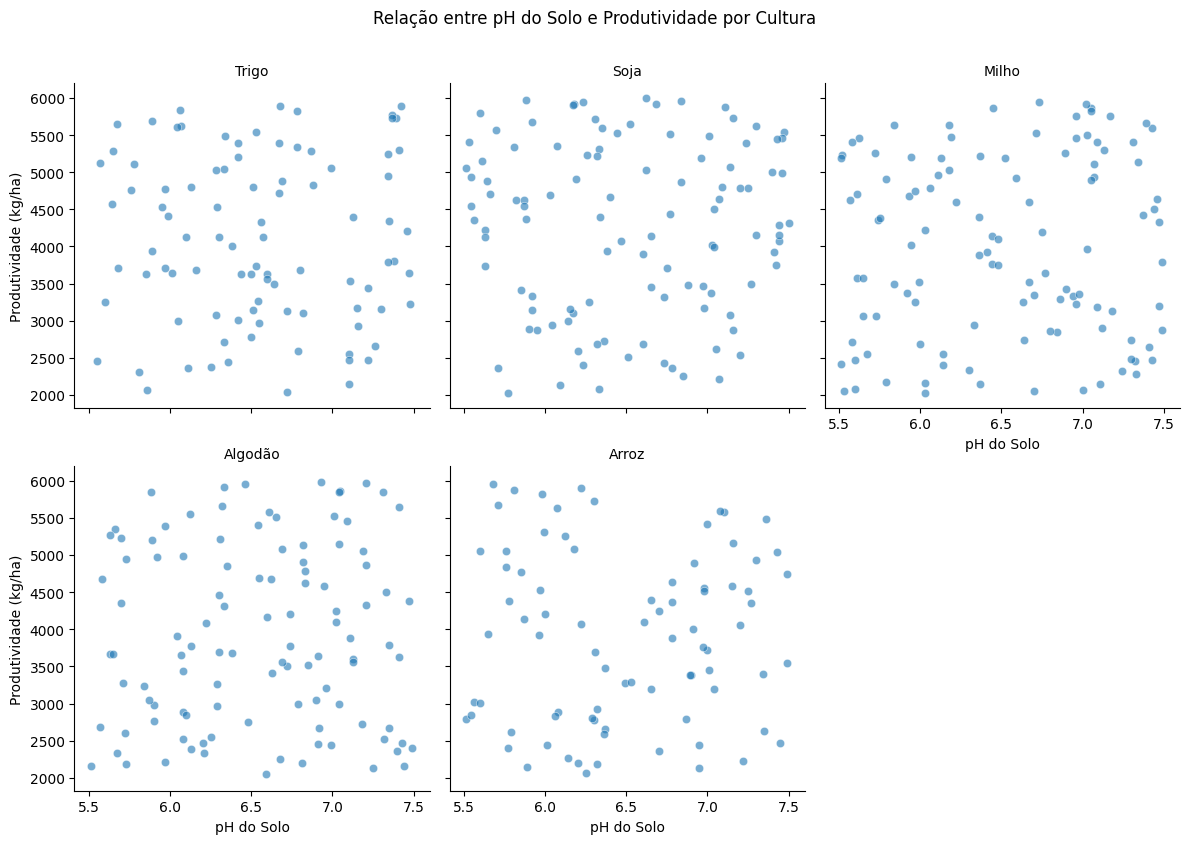

In [14]:
# Gráfico de dispersão separado por tipo de cultura

g = sns.FacetGrid(
    df_crop,
    col="tipo_cultura_pt",
    col_wrap=3,
    height=4,
    sharex=True,
    sharey=True
)

g.map_dataframe(
    sns.scatterplot,
    x="ph_solo",
    y="produtividade_kg_por_hectare",
    alpha=0.6
)

g.set_axis_labels("pH do Solo", "Produtividade (kg/ha)")
g.set_titles("{col_name}")
g.fig.suptitle("Relação entre pH do Solo e Produtividade por Cultura", y=1.05)

plt.show()


## Relação entre pH do Solo e Produtividade

Foi criada uma visualização para analisar a relação entre o pH do solo
e a produtividade agrícola, segmentada por tipo de cultura.

Essa análise permite observar tendências e possíveis faixas ideais
de pH para cada cultura.



A análise exploratória permitiu compreender a estrutura do dataset
e identificar relações relevantes entre fatores ambientais,
práticas agrícolas e produtividade.

Apesar de se tratar de uma análise inicial, os resultados indicam
o potencial dos dados para estudos mais aprofundados,
como modelagem preditiva e otimização agrícola.


In [18]:
# Calculando a eficiência (Kg produzidos por ml de pesticida)
df_crop['eficiencia_pesticida'] = df_crop['produtividade_kg_por_hectare'] / df_crop['uso_pesticida_ml']

#Ranking de eficiência por região
ranking_eficiencia = df_crop.groupby('regiao')['eficiencia_pesticida'].mean().sort_values(ascending=False)

print("Ranking de Eficiência no uso de Pesticidas por Região")
print(ranking_eficiencia)


Ranking de Eficiência no uso de Pesticidas por Região
regiao
South India    240.455844
North India    223.616492
Central USA    217.103005
South USA      211.354646
East Africa    195.906984
Name: eficiencia_pesticida, dtype: float64


A região de South India lidera o ranking de eficiência, produzindo significativamente mais por ml de defensivo em comparação às demais. Em contrapartida, East Africa apresenta o menor índice de aproveitamento. Recomenda-se uma auditoria técnica nos protocolos de aplicação de East Africa para identificar gargalos e reduzir desperdício de insumos.

In [19]:
# Exportando a base completa e padronizada para o time de dados
df_crop.to_csv('Smart_Farming_2024_Final.csv', index=False)

# Criando o Relatório de Alerta Fitossanitário (apenas casos com doença)
# Filtramos apenas o que é "Severo" ou "Mild"
alerta_campo = df_crop[df_crop['status_doenca_cultura'].isin(['Severe', 'Leve'])]

# Selecionamos apenas as colunas essenciais para o técnico de campo
colunas_alerta = ['id_fazenda', 'regiao', 'tipo_cultura_pt', 'status_doenca_cultura']
alerta_campo[colunas_alerta].to_csv('alerta_fitossanitario_2024.csv', index=False)

print("Arquivos exportados com sucesso: 'Smart_Farming_2024_Final.csv' e 'alerta_fitossanitario_2024.csv'")

Arquivos exportados com sucesso: 'Smart_Farming_2024_Final.csv' e 'alerta_fitossanitario_2024.csv'
